### ------------------------------------------------------------------------
# **INTELIGÊNCIA ARTIFICIAL**
## PROJETO FINAL
### -------------------------------------------------------------------------

### Titanic Dataset - Sobreviventes do Titanic
* https://www.kaggle.com/datasets/yasserh/titanic-dataset

In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics  as sts
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [97]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [99]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [100]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## Resumo geral da base de dados

In [101]:
print ("Linhas: " , df.shape[0])
print ("Colunas: " , df.shape[1])
print ("\nAtributos : \n" , df.columns.tolist())
print ("\nValores faltantes :  ", df.isnull().sum().values.sum())
print ("\nValores únicos :  \n", df.nunique())

Linhas:  891
Colunas:  12

Atributos : 
 ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Valores faltantes :   866

Valores únicos :  
 PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64


## Pré-processamento

### Remoção e verificação de dados faltantes
* PassengerId
* Ticket
* Name

In [102]:
df=df.drop(columns='PassengerId',axis=1)
df=df.drop(columns='Ticket',axis=1)
df=df.drop(columns='Name',axis=1)

In [103]:
# Verifica a quantidade de dados faltrantes
# df[df.isnull().any(axis=1)]
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [104]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [105]:
# ## Remoção utilizando SimpleImputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.NaN, strategy='median')

df['Age'] = imputer.fit_transform(df['Age'].values.reshape(-1,1))[:,0]


In [106]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,28.0,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [107]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### Tranformação de dados categóricos
* LabelEncoder
* get_dummies

* Apenas dois valores (LabelEncoder)

In [108]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

* Atributos com mais de dois valores (Embarked)

In [109]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [110]:
df["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [111]:
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [112]:
df = pd.get_dummies(data=df, columns=['Embarked'])
df = pd.get_dummies(data=df, columns=['Pclass'])
df2 = df.drop(columns = 'Cabin', axis = 1)

In [113]:
df = pd.get_dummies(data=df, columns=['Cabin'])

In [114]:
df.columns

Index(['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Pclass_1',
       ...
       'Cabin_E8', 'Cabin_F E69', 'Cabin_F G63', 'Cabin_F G73', 'Cabin_F2',
       'Cabin_F33', 'Cabin_F38', 'Cabin_F4', 'Cabin_G6', 'Cabin_T'],
      dtype='object', length=159)

In [115]:
df.isna().sum()

Survived     0
Sex          0
Age          0
SibSp        0
Parch        0
            ..
Cabin_F33    0
Cabin_F38    0
Cabin_F4     0
Cabin_G6     0
Cabin_T      0
Length: 159, dtype: int64

In [116]:
df2.isna().sum()

Survived      0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Pclass_1      0
Pclass_2      0
Pclass_3      0
dtype: int64

In [117]:
df

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,...,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T
0,0,1,22.0,1,0,7.2500,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,38.0,1,0,71.2833,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,26.0,0,0,7.9250,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,35.0,1,0,53.1000,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,35.0,0,0,8.0500,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,27.0,0,0,13.0000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
887,1,0,19.0,0,0,30.0000,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
888,0,0,28.0,1,2,23.4500,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
889,1,1,26.0,0,0,30.0000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Renomeação dos nomes das colunas

In [118]:
df.rename(columns={'Survived':'Sobreviventes',
                   'Pclasss':'Classe',
                   'Sex':'Sexo',
                   'Age':'Idade',
                   'SibSp':'Irmãos/Cônjuges',
                   'Parch':'Pais/Filhos',
                   'Fare':'Custo',
                   'Embarked_C':'Embarque_C',
                   'Embarked_Q':'Embarque_Q',
                   'Embarked_S':'Embarque_S'}, inplace=True)

In [119]:
df

,Sobreviventes,Sexo,Idade,Irmãos/Cônjuges,Pais/Filhos,Custo,Embarque_C,Embarque_Q,Embarque_S,Pclass_1,...,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T
0,0,1,22.0,1,0,7.2500,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,38.0,1,0,71.2833,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,26.0,0,0,7.9250,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,35.0,1,0,53.1000,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,35.0,0,0,8.0500,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,27.0,0,0,13.0000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
887,1,0,19.0,0,0,30.0000,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
888,0,0,28.0,1,2,23.4500,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
889,1,1,26.0,0,0,30.0000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Normalização dos dados
* Standard Scaler

In [120]:
std = StandardScaler()
columns = ['Idade','Custo']
scaled = std.fit_transform(df[['Idade','Custo']])
scaled = pd.DataFrame(scaled,columns=columns)
df=df.drop(columns=columns,axis=1)


In [121]:
# Teste sem cabine
columns = ['Age','Fare']
scaled2 = std.fit_transform(df2[['Age','Fare']])
scaled2 = pd.DataFrame(scaled2, columns = columns)
df2 = df2.drop(columns = columns, axis=1)

In [122]:
df2 = df2.merge(scaled2, left_index=True, right_index=True, how = "right")
df2

,Survived,Sex,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Age,Fare
0,0,1,1,0,0,0,1,0,0,1,-0.565736,-0.502445
1,1,0,1,0,1,0,0,1,0,0,0.663861,0.786845
2,1,0,0,0,0,0,1,0,0,1,-0.258337,-0.488854
3,1,0,1,0,0,0,1,1,0,0,0.433312,0.420730
4,0,1,0,0,0,0,1,0,0,1,0.433312,-0.486337
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,0,0,0,1,0,1,0,-0.181487,-0.386671
887,1,0,0,0,0,0,1,1,0,0,-0.796286,-0.044381
888,0,0,1,2,0,0,1,0,0,1,-0.104637,-0.176263
889,1,1,0,0,1,0,0,1,0,0,-0.258337,-0.044381


In [123]:
df=df.merge(scaled, left_index=True, right_index=True, how = "right")
df

,Sobreviventes,Sexo,Irmãos/Cônjuges,Pais/Filhos,Embarque_C,Embarque_Q,Embarque_S,Pclass_1,Pclass_2,Pclass_3,...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Idade,Custo
0,0,1,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,-0.565736,-0.502445
1,1,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0.663861,0.786845
2,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,-0.258337,-0.488854
3,1,0,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0.433312,0.420730
4,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0.433312,-0.486337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,-0.181487,-0.386671
887,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,-0.796286,-0.044381
888,0,0,1,2,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,-0.104637,-0.176263
889,1,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,-0.258337,-0.044381


### Separação entre treino e teste (70% e 30%)

In [124]:
X = df.drop(['Sobreviventes'], axis=1).values
y = df['Sobreviventes'].values

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [126]:
#Teste sem cabine
X2 = df2.drop(['Survived'], axis=1).values
y2 = df2['Survived'].values

In [127]:
#Teste sem cabine
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3)

### Aplicação do balanceamento entre as classes

In [128]:
#Aplica balanceamento nas classes
from imblearn.over_sampling import SMOTE

In [129]:
sm = SMOTE()
x_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)

In [130]:
#Teste sem cabine
x_train_oversampled2, y_train_oversampled2 = sm.fit_resample(X_train2, y_train2)

In [131]:
print(x_train_oversampled.shape)
print(X_train.shape)

(768, 158)
(623, 158)


In [132]:
print(x_train_oversampled2.shape)
print(X_train2.shape)

(774, 11)
(623, 11)


## Aplicação dos Classificadores

#### Imports

In [133]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold
import statistics as sts

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [134]:
forest = RandomForestClassifier()
tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()

param_tree = {'max_features': ['sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
param_forest = {'criterion': ['gini', 'entropy', 'log_loss'],
                'max_features':['sqrt','log2'],
                'n_estimators': [10, 20, 30, 60]
               }
param_knn = { 'n_neighbors':[3, 5, 7],
              'weights':['uniform','distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': [20, 30, 40, 50]
            }

#### Árvore de decisão

In [135]:
g_search_tree = GridSearchCV(estimator = tree,
                             param_grid = param_tree,
                             cv = 10,
                             return_train_score=True)

In [136]:
g_search_tree.fit(x_train_oversampled, y_train_oversampled);
print(g_search_tree.best_estimator_)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=9, max_features='sqrt')


In [137]:
g_results_tree = pd.DataFrame(g_search_tree.cv_results_)
g_results_tree.iloc[g_search_tree.best_index_,22:32]

split0_train_score    0.806078
split1_train_score     0.68741
split2_train_score    0.846599
split3_train_score    0.681621
split4_train_score    0.869754
split5_train_score    0.843705
split6_train_score    0.849493
split7_train_score    0.772793
split8_train_score    0.836705
split9_train_score    0.726879
Name: 48, dtype: object

In [138]:
# Acurácia
print(g_search_tree.best_score_)

0.7722658920027341


In [139]:
# Acurácia do teste
y_pred_tree = g_search_tree.predict(X_test)
accuracy_score(y_test, y_pred_tree)

0.8134328358208955

In [140]:
# Outra forma de printar a acurácia do teste
best_tree = g_search_tree.best_estimator_
print(best_tree.score(X_test, y_test))

0.8134328358208955


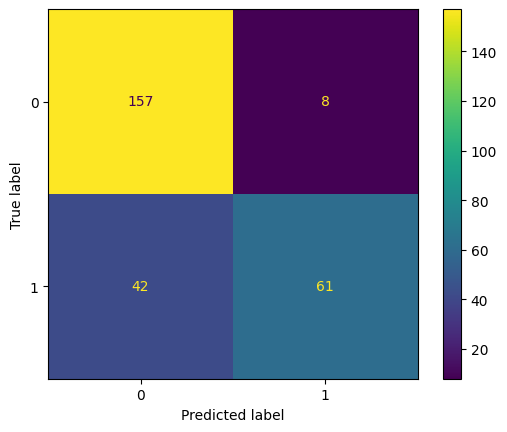

In [141]:
cm = confusion_matrix(y_test, y_pred_tree)
ConfusionMatrixDisplay(cm).plot()

#### Árvore de decisão sem a coluna cabine (Utilizando o df2 criado no pré-processamento)

In [142]:
g_search_tree2 = GridSearchCV(estimator = tree,
                              param_grid = param_tree,
                              cv = 10,
                              return_train_score=True)

In [143]:
g_search_tree2.fit(x_train_oversampled2, y_train_oversampled2);
print(g_search_tree2.best_estimator_)

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=8,
                       max_features='log2')


In [144]:
g_results_tree2 = pd.DataFrame(g_search_tree2.cv_results_)
g_results_tree2.iloc[g_search_tree2.best_index_,22:32]

split0_train_score    0.877874
split1_train_score    0.902299
split2_train_score    0.876437
split3_train_score     0.87931
split4_train_score    0.885222
split5_train_score    0.852224
split6_train_score    0.853659
split7_train_score    0.863702
split8_train_score    0.876614
split9_train_score    0.880918
Name: 57, dtype: object

In [145]:
# Acurácia
print(g_search_tree2.best_score_)

0.8011988011988013


In [146]:
# Acurácia do teste
y_pred_tree2 = g_search_tree2.predict(X_test2)
accuracy_score(y_test2, y_pred_tree2)

0.7798507462686567

In [147]:
# Outra forma de printar a acurácia do teste
best_tree2 = g_search_tree2.best_estimator_
print(best_tree2.score(X_test2, y_test2))

0.7798507462686567


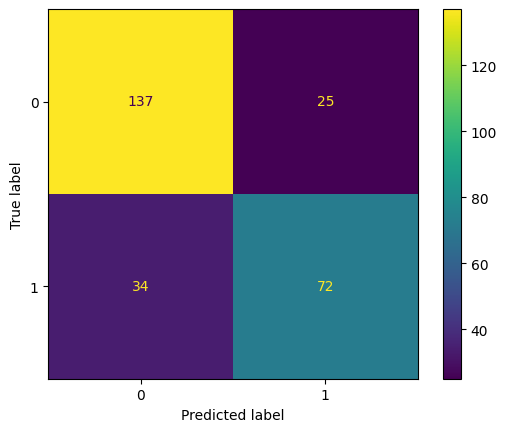

In [148]:
cm = confusion_matrix(y_test2, y_pred_tree2)
ConfusionMatrixDisplay(cm).plot()

#### Random Forest

In [149]:
g_search_forest = GridSearchCV(estimator = forest,
                               param_grid = param_forest,
                               cv = 10,
                               return_train_score=True)

In [150]:
g_search_forest.fit(x_train_oversampled, y_train_oversampled);
print(g_search_forest.best_estimator_)

RandomForestClassifier(criterion='entropy', n_estimators=60)


In [151]:
g_results_forest = pd.DataFrame(g_search_forest.cv_results_)
g_results_forest.iloc[g_search_forest.best_index_,21:31]

split0_train_score    0.994211
split1_train_score    0.994211
split2_train_score    0.994211
split3_train_score    0.994211
split4_train_score    0.994211
split5_train_score    0.994211
split6_train_score    0.991317
split7_train_score    0.992764
split8_train_score     0.99422
split9_train_score    0.992775
Name: 11, dtype: object

In [152]:
# Acurácia
print(g_search_forest.best_score_)

0.8581852358168147


In [153]:
y_pred_forest = g_search_forest.predict(X_test)
accuracy_score(y_test, y_pred_forest)

0.8022388059701493

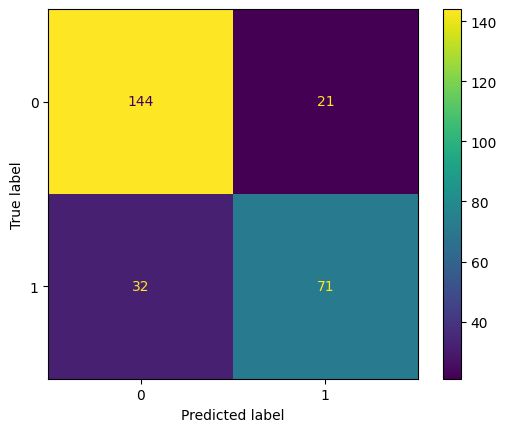

In [154]:
cm = confusion_matrix(y_test, y_pred_forest)
ConfusionMatrixDisplay(cm).plot()

#### K-nearest neighbors

In [155]:
g_search_knn = GridSearchCV(estimator = knn,
                            param_grid = param_knn,
                            cv = 10,
                            return_train_score=True)

In [156]:
g_search_knn.fit(x_train_oversampled, y_train_oversampled);
print(g_search_knn.best_estimator_)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=20, n_neighbors=3,
                     weights='distance')


In [157]:
g_results_knn = pd.DataFrame(g_search_knn.cv_results_)
g_results_knn.iloc[g_search_knn.best_index_,22:32]

split0_train_score    0.994211
split1_train_score    0.994211
split2_train_score    0.994211
split3_train_score    0.994211
split4_train_score    0.994211
split5_train_score    0.994211
split6_train_score    0.992764
split7_train_score    0.992764
split8_train_score     0.99422
split9_train_score    0.992775
Name: 25, dtype: object

In [158]:
# Acurácia
print(g_search_knn.best_score_)

0.8229323308270675


In [159]:
# Outra forma de printar a acurácia do teste
best_knn = g_search_knn.best_estimator_
print(best_knn.score(X_test, y_test))

0.7686567164179104


In [160]:
y_pred_knn = g_search_knn.predict(X_test)
accuracy_score(y_test, y_pred_knn)

0.7686567164179104

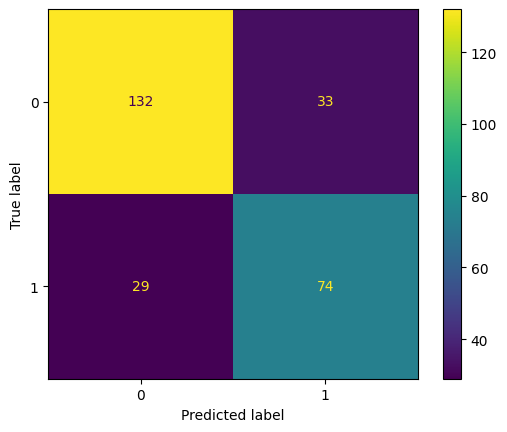

In [161]:
cm = confusion_matrix(y_test, y_pred_knn)
ConfusionMatrixDisplay(cm).plot()

## Redes Neurais

### Previsores e Alvo

In [162]:
previsores = df.drop(['Sobreviventes'], axis=1)

In [163]:
alvo = df['Sobreviventes'].values

#### Escalonamento dos previsores



In [164]:
previsores = StandardScaler().fit_transform(previsores)

In [165]:
previsores

array([[ 0.73769513,  0.43279337, -0.47367361, ..., -0.03352008,
        -0.56573646, -0.50244517],
       [-1.35557354,  0.43279337, -0.47367361, ..., -0.03352008,
         0.66386103,  0.78684529],
       [-1.35557354, -0.4745452 , -0.47367361, ..., -0.03352008,
        -0.25833709, -0.48885426],
       ...,
       [-1.35557354,  0.43279337,  2.00893337, ..., -0.03352008,
        -0.1046374 , -0.17626324],
       [ 0.73769513, -0.4745452 , -0.47367361, ..., -0.03352008,
        -0.25833709, -0.04438104],
       [ 0.73769513, -0.4745452 , -0.47367361, ..., -0.03352008,
         0.20276197, -0.49237783]])

### Scikit Learn

In [166]:
from sklearn.neural_network import MLPClassifier

In [167]:
rna = MLPClassifier()

param_rna = {'activation' : ['identity', 'logistic', 'tanh', 'relu'],
              'solver' : ['adam'],
              'learning_rate' : ['constant', 'invscaling', 'adaptive'],
              'max_iter' : [500],
              'hidden_layer_sizes' : [(10,),(10,10,),(10,10,10)]
             }

In [168]:
g_search_rna = GridSearchCV(estimator = rna,
                            param_grid = param_rna,
                            cv = 10,
                            return_train_score=True)

In [169]:
g_search_rna.fit(previsores, alvo)
print(g_search_rna.best_estimator_)

MLPClassifier(activation='logistic', hidden_layer_sizes=(10, 10, 10),
              learning_rate='adaptive', max_iter=500)


In [170]:
g_results_rna = pd.DataFrame(g_search_rna.cv_results_)
g_results_rna.iloc[g_search_rna.best_index_,23:33]

split0_train_score    0.875156
split1_train_score    0.876559
split2_train_score    0.877805
split3_train_score    0.872818
split4_train_score    0.865337
split5_train_score    0.876559
split6_train_score    0.870324
split7_train_score    0.876559
split8_train_score    0.862843
split9_train_score    0.877805
Name: 17, dtype: object

In [171]:
# Acurácia
print(g_search_rna.best_score_)

0.8035830212234705


In [172]:
# Print da acurácia do teste
y_pred_rna = g_search_rna.predict(X_test)
accuracy_score(y_test, y_pred_rna)

0.6902985074626866

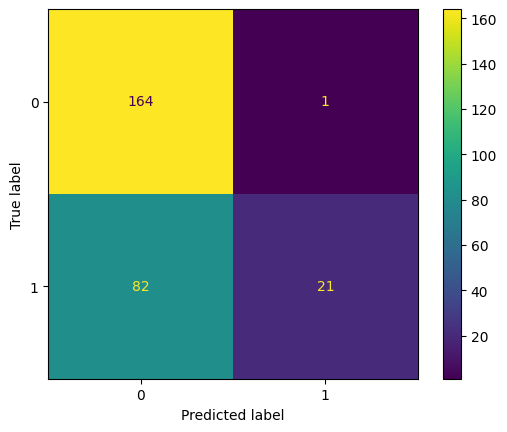

In [173]:
cm = confusion_matrix(y_test, y_pred_rna)
ConfusionMatrixDisplay(cm).plot()

### Keras

In [174]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.utils import np_utils

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Columns: 159 entries, Sobreviventes to Custo
dtypes: float64(2), int64(4), uint8(153)
memory usage: 175.0 KB


In [176]:
x_train_oversampled.shape

(768, 158)

In [177]:
modelo = Sequential()
modelo.add(Dense(100, input_dim=X.shape[1], kernel_initializer='uniform', activation='relu'))
modelo.add(Dense(12, kernel_initializer='uniform', activation='softsign'))
modelo.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [178]:
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               15900     
                                                                 
 dense_4 (Dense)             (None, 12)                1212      
                                                                 
 dense_5 (Dense)             (None, 1)                 13        
                                                                 
Total params: 17,125
Trainable params: 17,125
Non-trainable params: 0
_________________________________________________________________


In [179]:
modelo.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

historico = modelo.fit(x_train_oversampled,
                       y_train_oversampled,
                       epochs = 75,
                       validation_data = (X_test, y_test))

Epoch 1/75


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(32, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


24/24 [==============================] - 1s 12ms/step - loss: 0.0000e+00 - accuracy: 0.4948 - val_loss: 0.0000e+00 - val_accuracy: 0.6157
Epoch 2/75
 1/24 [>.............................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.6250

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


24/24 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.6157
Epoch 3/75
24/24 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.6157
Epoch 4/75
24/24 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.6157
Epoch 5/75
24/24 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.6157
Epoch 6/75
24/24 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.6157
Epoch 7/75
24/24 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.6157
Epoch 8/75
24/24 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+0

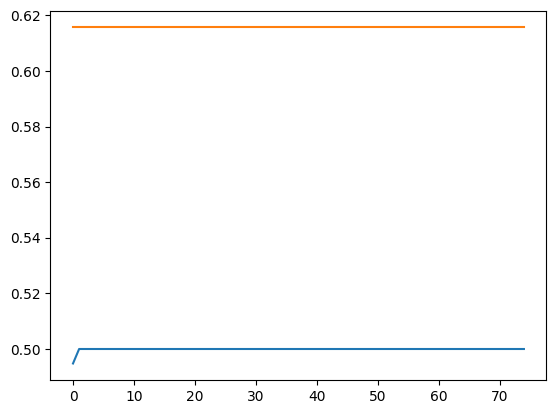

In [180]:
# Gráfico para visualizar os erros e accuracy
historico.history.keys()
#evolução do erro, azul
plt.plot(historico.history['accuracy'])
#performance da rede
plt.plot(historico.history['val_accuracy'])

In [181]:
# Obtenção das previsões
y_pred_keras = modelo.predict(X_test)
y_pred_keras = (y_pred_keras > 0.5).astype(int)

9/9 [==============================] - 0s 2ms/step


In [182]:
accuracy_score(y_test,y_pred_keras)

0.6156716417910447

## Extrato final
##### Todos, exceto o rna com Keras, foram utilizados GridSearchCV

In [183]:
print("Árvore de decisão: ")
print("treino:    ", g_results_tree.loc[g_search_tree.best_index_,'mean_test_score'], "teste: ", accuracy_score(y_test, y_pred_tree))

print("\nÁrvore de decisão sem cabine: ")
print("treino:    ", g_results_tree2.loc[g_search_tree2.best_index_,'mean_test_score'], "teste: ", accuracy_score(y_test2, y_pred_tree2))

print("\nRandom Forest: ")
print("treino:    ", g_results_forest.loc[g_search_forest.best_index_,'mean_test_score'], "teste: ", accuracy_score(y_test, y_pred_forest))

print("\nKNN: ")
print("treino:    ", g_results_knn.loc[g_search_knn.best_index_,'mean_test_score'], "teste: ", accuracy_score(y_test, y_pred_knn))

print("\nRNA com Scikit: ")
print("treino:    ", g_results_rna.loc[g_search_rna.best_index_,'mean_test_score'], "teste: ", accuracy_score(y_test, y_pred_rna))

print("\nRNA com Keras: ")
print("treino:    ", max(historico.history['accuracy']), "teste: ", accuracy_score(y_test, y_pred_keras))

Árvore de decisão: 
treino:     0.7722658920027341 teste:  0.8134328358208955

Árvore de decisão sem cabine: 
treino:     0.8011988011988013 teste:  0.7798507462686567

Random Forest: 
treino:     0.8581852358168147 teste:  0.8022388059701493

KNN: 
treino:     0.8229323308270675 teste:  0.7686567164179104

RNA com Scikit: 
treino:     0.8035830212234705 teste:  0.6902985074626866

RNA com Keras: 
treino:     0.5 teste:  0.6156716417910447
